### EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/NBA_Players.csv')
data.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PF,PTS,Potw,APG_Leader,MVP,PPG_Leader,RPG_Leader,Rookie,WS_Leader,Salary
0,1991,Alaa Abdelnaby,PF,22.0,POR,43,0,6.7,1.3,2.7,...,0.9,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,395000
1,1991,Mahmoud Abdul-Rauf,PG,21.0,DEN,67,19,22.5,6.2,15.1,...,2.2,14.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1660000
2,1991,Mark Acres,C,28.0,ORL,68,0,19.3,1.6,3.1,...,3.2,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437000
3,1991,Michael Adams,PG,28.0,DEN,66,66,35.5,8.5,21.5,...,2.5,26.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,825000
4,1991,Mark Aguirre,SF,31.0,DET,78,13,25.7,5.4,11.7,...,2.7,14.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1115000


#### Problem 1: Relationship between Player Statistics and Player of the Week

##### Filter Columns

In [3]:
col_potw = ['Potw', 'G', 'GS', 'FG_Prct', 'Three_P_Prct', 'Two_P_Prct', 'eFG_Prct', 'FT_Prct', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
features_potw = data[col_potw[1:]]
potw = data[col_potw[0]]

##### Scatter Plot

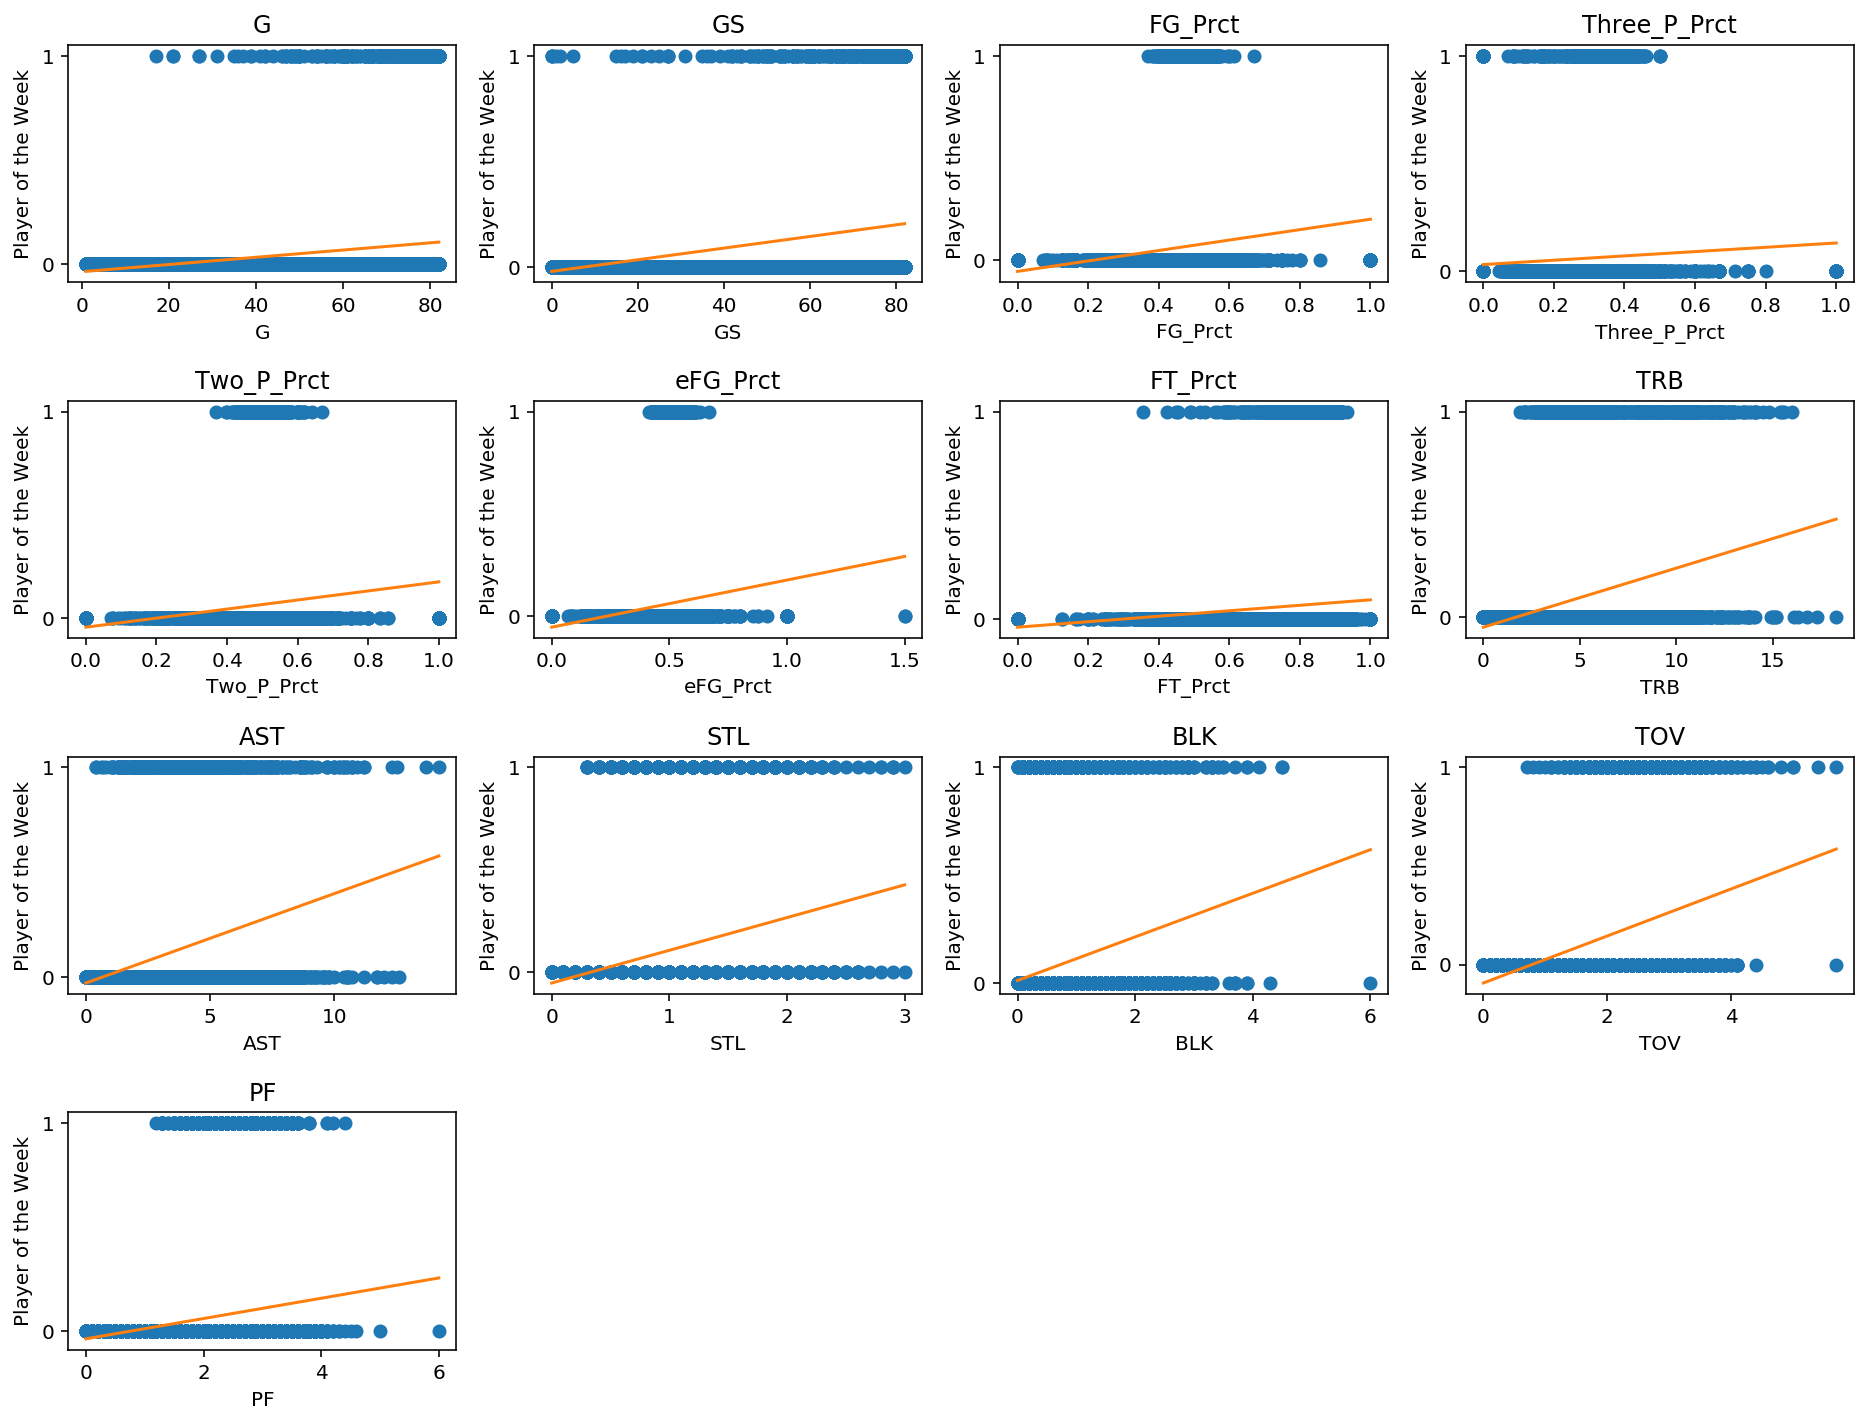

In [4]:
# Define plot dimensions
plt_row = 4
plt_col = 4
plt.figure(figsize = (plt_col * 4, plt_row * 3))

for i, col in enumerate(features_potw.columns):
    plt.subplot(plt_row, plt_col, i + 1)
    plt.subplots_adjust(hspace = 0.5)
    x = features_potw[col]
    y = potw
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Player of the Week')
    plt.yticks([0, 1])

plt.savefig('../plot/eda_1_scatter.png', dpi = 300, bbox_inches = 'tight')

##### Correlation Heatmap

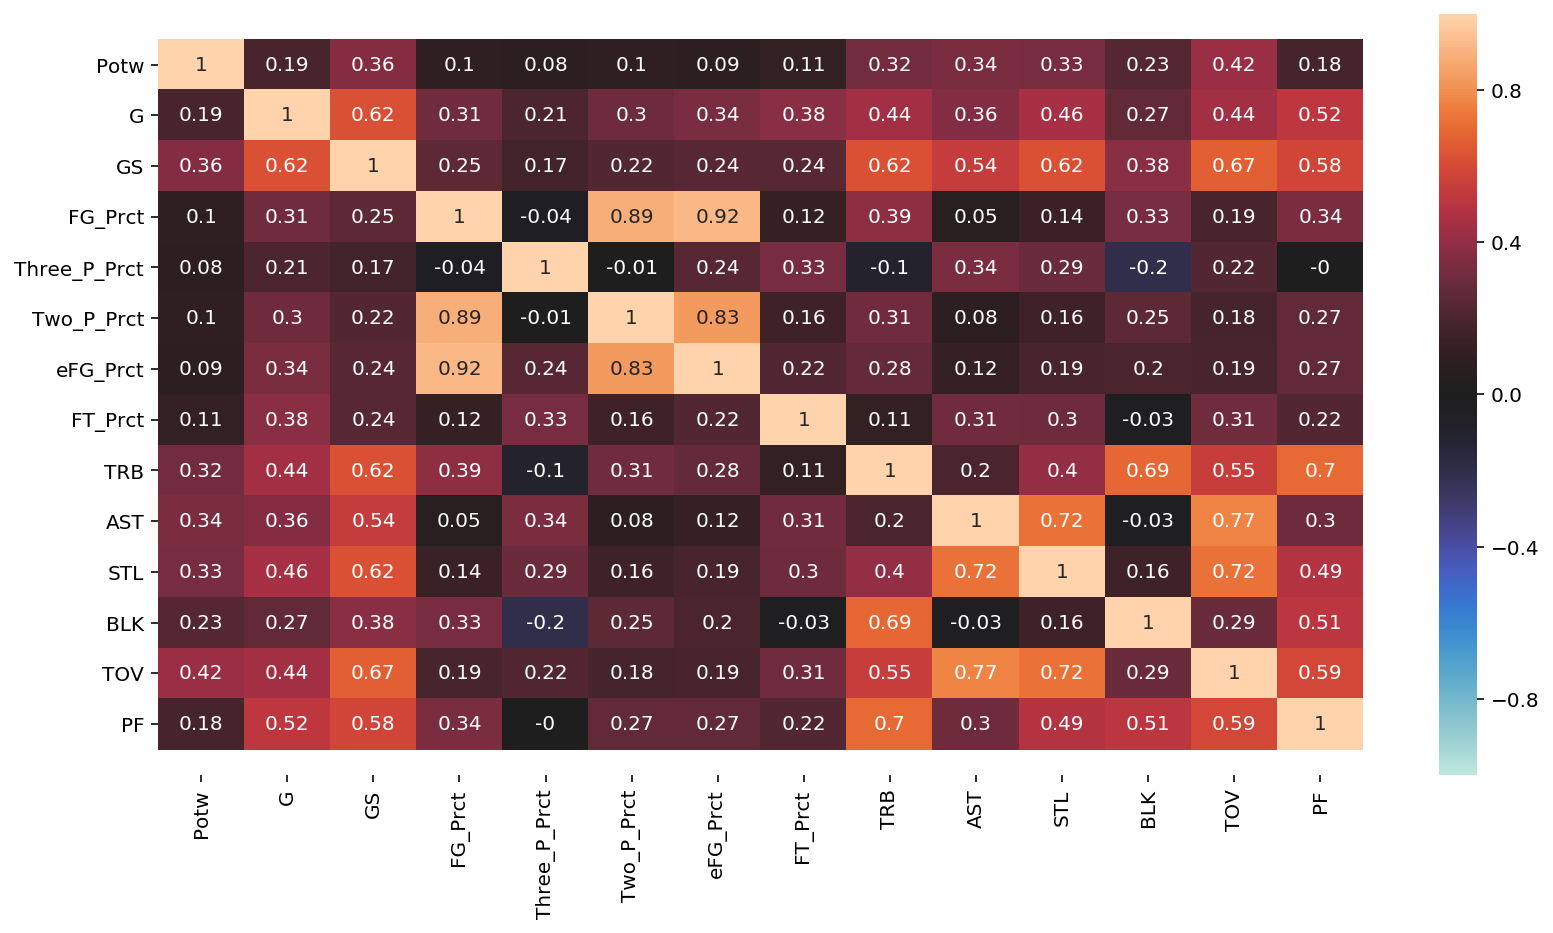

In [5]:
corr_mat_potw = data[col_potw].corr().round(2)
plt.figure(figsize = (3 + len(col_potw) * 0.75, len(col_potw) * 0.5))
ax = sns.heatmap(data = corr_mat_potw, annot = True, vmin = -1, vmax = 1, center = 0)
ax.set_ylim(len(col_potw) + 0.5, - 0.5)
plt.savefig('../plot/eda_1_heatmap.png', dpi = 300, bbox_inches = 'tight')
plt.show()

##### Frequency Table

In [6]:
potw_count = data[col_potw].groupby('Potw')[['G']].count().rename(columns = {'G': 'Count'})
potw_count['Prct'] = potw_count.Count / data[col_potw].shape[0]
potw_count

,Count,Prct
Potw,,
0.0,8505,0.944685
1.0,498,0.055315


#### Problem 2: Relationship between NBA Titles and Player Salary

##### Filter Columns

In [7]:
col_salary = ['Salary', 'Year', 'Potw', 'APG_Leader', 'MVP', 'PPG_Leader', 'RPG_Leader', 'Rookie', 'WS_Leader']
features_salary = data[col_salary[1:]]
salary = data[col_salary[0]]

##### Scatter Plot

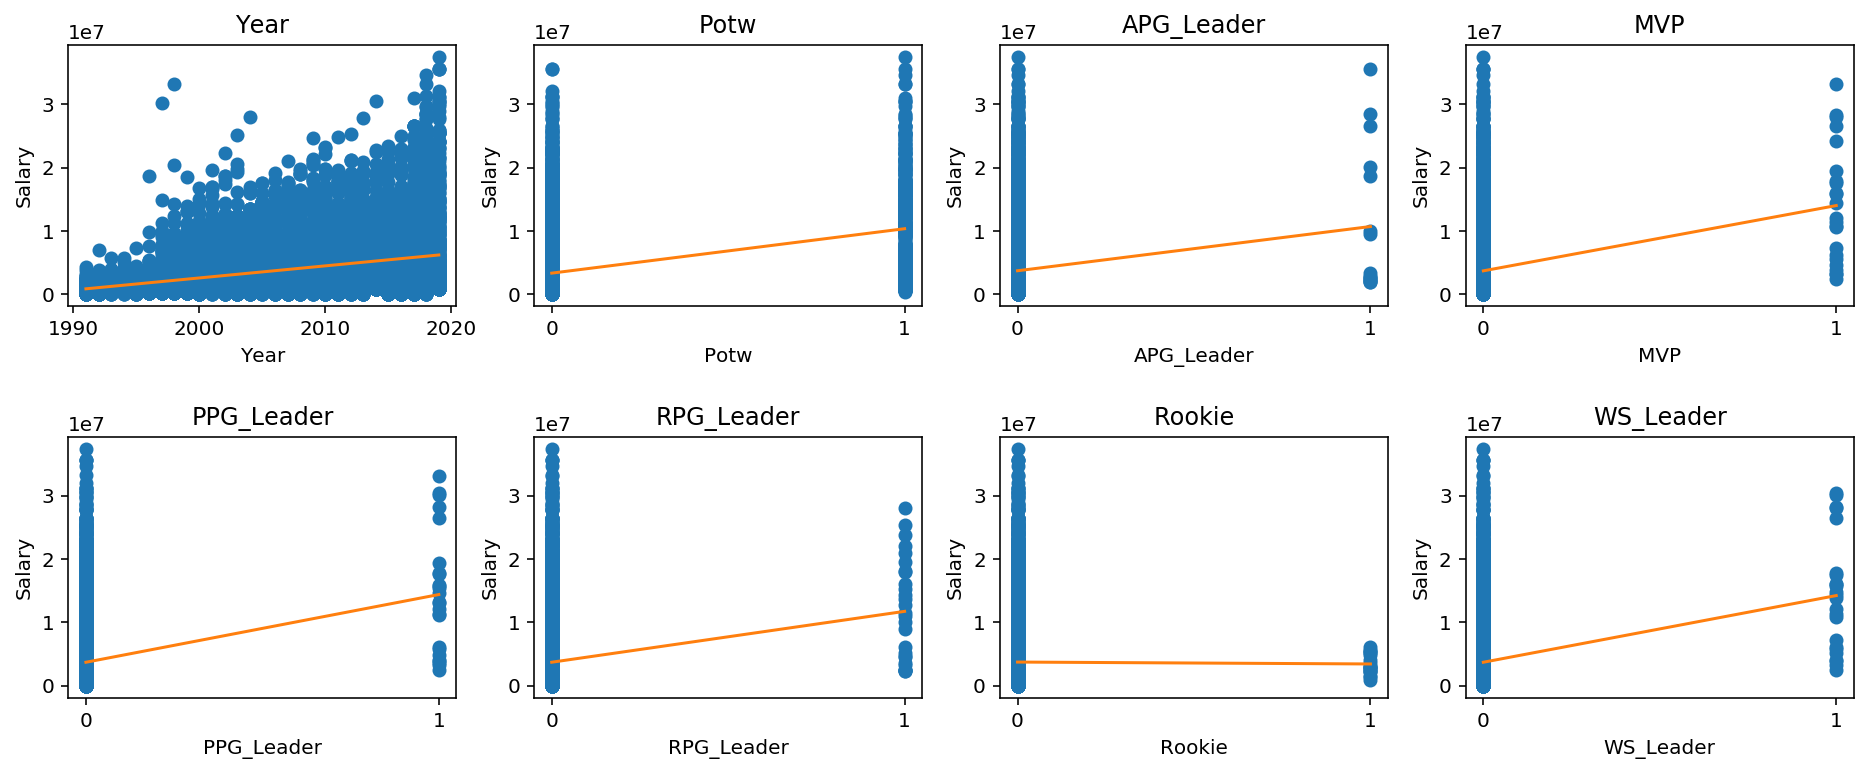

In [8]:
# Define plot dimensions
plt_row = 2
plt_col = 4
plt.figure(figsize = (plt_col * 4, plt_row * 3))

for i, col in enumerate(features_salary.columns):
    plt.subplot(plt_row, plt_col, i + 1)
    plt.subplots_adjust(hspace = 0.5)
    x = features_salary[col]
    y = salary
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Salary')
    if (i != 0): plt.xticks([0, 1])

plt.savefig('../plot/eda_2_scatter.png', dpi = 300, bbox_inches = 'tight')

##### Correlation Heatmap

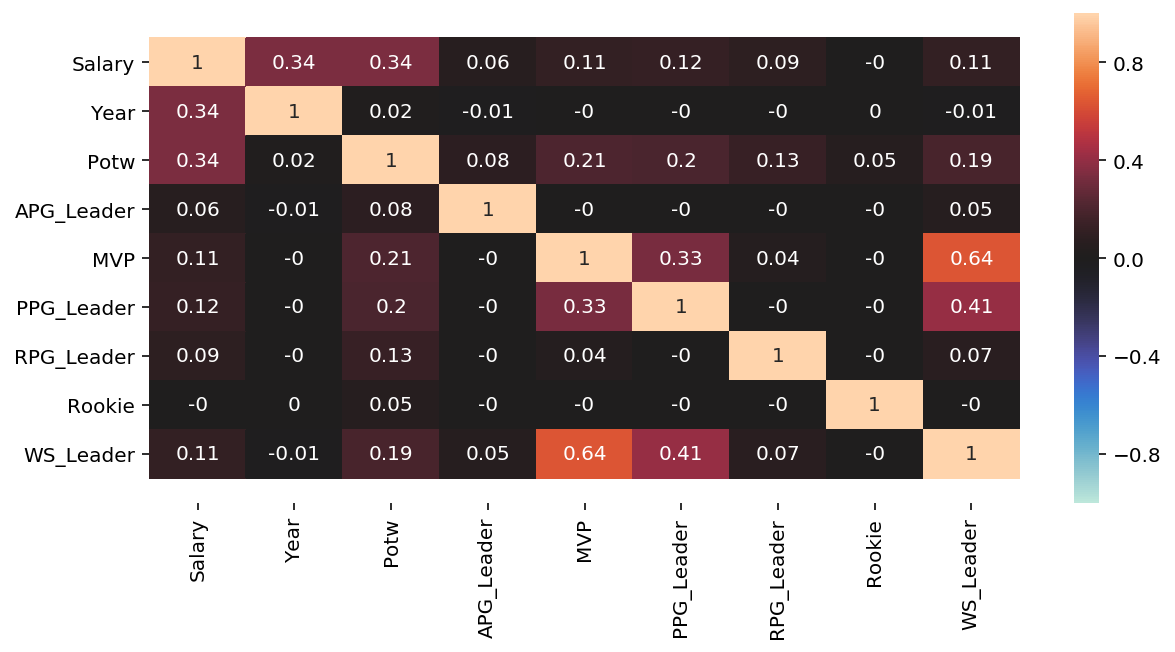

In [9]:
corr_mat_salary = data[col_salary].corr().round(2)
plt.figure(figsize = (3 + len(col_salary) * 0.75, len(col_salary) * 0.5))
ax = sns.heatmap(data = corr_mat_salary, annot = True, vmin = -1, vmax = 1, center = 0)
ax.set_ylim(len(col_salary) + 0.5, - 0.5)
plt.savefig('../plot/eda_2_heatmap.png', dpi = 300, bbox_inches = 'tight')
plt.show()

##### Frequency Table

In [10]:
salary_count = data[col_salary][['Year', 'Salary']]
salary_count.loc[salary_count.Year < 2000, 'Decade'] = 1990
salary_count.loc[salary_count.Year.between(2000, 2009), 'Decade'] = 2000
salary_count.loc[salary_count.Year > 2009, 'Decade'] = 2010
salary_count.groupby('Decade')[['Salary']].count().rename(columns = {'Salary': 'Count'})

,Count
Decade,
1990.0,2416
2000.0,2998
2010.0,3589
